In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn import metrics

In [2]:
# Load adult dataset
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.shape

(48842, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.isna().any()

,0
age,False
workclass,True
fnlwgt,False
education,False
education-num,False
marital-status,False
occupation,True
relationship,False
race,False
sex,False


In [6]:
df.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
# Drop non-categorical & null values
dropped_df = df.drop(['age', 'workclass', 'fnlwgt', 'education-num', 'occupation', 'capital-gain', 'capital-loss',
                      'hours-per-week', 'native-country'], axis=1)
dropped_df.head()

,education,marital-status,relationship,race,sex,income
0,Bachelors,Never-married,Not-in-family,White,Male,<=50K
1,Bachelors,Married-civ-spouse,Husband,White,Male,<=50K
2,HS-grad,Divorced,Not-in-family,White,Male,<=50K
3,11th,Married-civ-spouse,Husband,Black,Male,<=50K
4,Bachelors,Married-civ-spouse,Wife,Black,Female,<=50K


In [9]:
dropped_df.shape

(48842, 6)

In [10]:
dropped_df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [11]:
dropped_df.columns

Index(['education', 'marital-status', 'relationship', 'race', 'sex', 'income'], dtype='object')

In [12]:
# Apply pre-processing
cols_list = ['education', 'marital-status', 'relationship', 'race', 'sex']

labelencoder = LabelEncoder()
for i in cols_list:
    dropped_df[i] = labelencoder.fit_transform(dropped_df[i])
dropped_df.head()

,education,marital-status,relationship,race,sex,income
0,9,4,1,4,1,<=50K
1,9,2,0,4,1,<=50K
2,11,0,1,4,1,<=50K
3,1,2,0,2,1,<=50K
4,9,2,5,2,0,<=50K


In [13]:
dropped_df['target'] = dropped_df['income'].apply(lambda x: 0 if x == '<=50K' or x == '<=50K.' else 1)
dropped_df.head()

,education,marital-status,relationship,race,sex,income,target
0,9,4,1,4,1,<=50K,0
1,9,2,0,4,1,<=50K,0
2,11,0,1,4,1,<=50K,0
3,1,2,0,2,1,<=50K,0
4,9,2,5,2,0,<=50K,0


In [14]:
dropped_df['target'].unique()

array([0, 1])

In [15]:
dropped_df['target'].value_counts()

,count
target,
0,37155
1,11687


In [16]:
dropped_df['income'].value_counts()

,count
income,
<=50K,24720
<=50K.,12435
>50K,7841
>50K.,3846


In [17]:
# Separate features and labels
X = dropped_df.iloc[:, :-2]
y = dropped_df.loc[:, 'target']

In [18]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1)
len(X_train), len(X_test), len(y_train), len(y_test)

(39073, 9769, 39073, 9769)

In [19]:
# Apply Categorical Naive Bayes
cnb = CategoricalNB()
cnb.fit(X_train, y_train)

CategoricalNB()

In [20]:
print(f'Accuracy on the test set: {round(cnb.score(X_test, y_test), 4)}')


Accuracy on the test set: 0.7606


In [21]:
# Plot confusion matrix
cat_labels = ['<=50K_<=50K.', '>50K_>50K.']
y_pred = cnb.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=cat_labels)

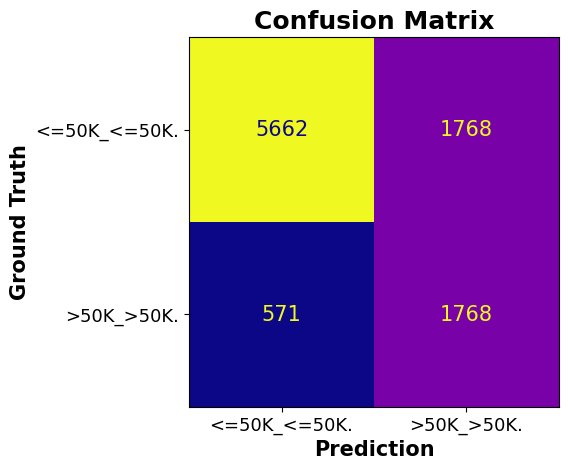

In [22]:
disp.plot(cmap='plasma', colorbar=False, text_kw={'size': 15})

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [23]:
print('F1 score:', round(metrics.f1_score(y_test, y_pred, average='weighted'), 4))


F1 score: 0.7745


In [24]:
# Print classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      7430
           1       0.50      0.76      0.60      2339

    accuracy                           0.76      9769
   macro avg       0.70      0.76      0.72      9769
weighted avg       0.81      0.76      0.77      9769

